In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [6]:
data = pd.read_csv('BRCA_pam50.tsv', sep='\t', index_col=0)
data

,UBE2T,BIRC5,NUF2,CDC6,CCNB1,TYMS,MYBL2,CEP55,MELK,NDC80,...,NAT1,FOXA1,BLVRA,MMP11,GPR160,FGFR4,GRB7,TMEM45B,ERBB2,Subtype
TCGA-A1-A0SB-01A,2.507502,2.172270,0.952906,1.683162,3.108067,3.332448,2.982268,1.613604,1.641565,1.218495,...,0.926850,2.869065,3.896839,1.387963,1.141875,0.544443,2.942855,0.875017,5.014075,Normal-like
TCGA-A1-A0SD-01A,3.016158,2.514871,1.509129,1.354016,3.685035,2.125453,3.047474,2.333704,1.996853,1.171520,...,4.905805,6.677118,5.044878,5.631087,3.942169,3.404177,3.655783,2.757977,5.999041,Luminal A
TCGA-A1-A0SE-01A,4.626989,3.289047,2.102190,2.116975,4.525954,2.906470,3.798966,2.745027,2.451070,2.070499,...,6.053451,6.690114,5.843557,5.504526,3.881691,1.038253,3.156081,1.355837,5.585759,Luminal A
TCGA-A1-A0SF-01A,3.417782,2.262844,1.569301,1.800667,3.823694,2.843952,3.807282,2.141323,2.082400,1.693568,...,6.883599,6.280921,5.705410,3.511572,4.374803,2.299735,3.054917,1.315680,5.215699,Luminal A
TCGA-A1-A0SG-01A,2.948244,2.298689,1.116282,1.552142,3.582144,2.886328,2.697313,1.968233,1.662241,1.280947,...,1.814486,6.284076,4.622443,6.845350,3.381032,3.586285,2.845107,3.359571,5.786065,Luminal A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-BH-A0BV-11A,1.870352,1.072286,0.608802,0.902198,2.587268,2.266861,1.450288,0.952375,0.914605,0.726684,...,2.266702,4.919079,4.153488,0.861931,2.403286,0.401022,4.044734,1.569947,4.871977,Healthy
TCGA-BH-A0BC-11A,1.739019,1.219743,0.573760,0.935661,1.957932,2.211228,1.837159,1.142789,0.948133,0.433871,...,1.798099,4.237113,4.438927,0.786682,1.765614,0.761287,3.296281,1.124510,4.406197,Healthy
TCGA-BH-A0DD-11A,1.464052,0.597237,0.340499,1.037614,1.665574,1.312091,1.086920,0.623715,0.544445,0.429620,...,2.147100,1.172748,5.040978,0.415481,1.626146,0.113552,0.794801,0.177137,3.166627,Healthy
TCGA-BH-A0DH-11A,1.686862,1.206100,0.259961,0.704237,2.288728,1.789974,1.095518,0.541392,0.526630,0.471734,...,2.361668,4.795254,5.046676,1.342472,1.866943,0.619597,2.776416,1.925006,4.462839,Healthy


In [11]:
pca = PCA(n_components=2)
X = data.iloc[:, :50]
data[['comp1', 'comp2']] = pca.fit_transform(X)[:, :2]

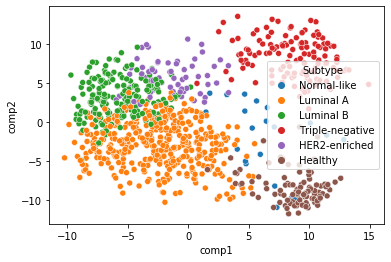

In [12]:
plt.tight_layout()
sns.scatterplot(x = data['comp1'], y = data['comp2'], hue = data['Subtype'])

In [13]:
tsne = TSNE(n_components=2)
data[['tsne1', 'tsne2']] = tsne.fit_transform(X)[:, :2]

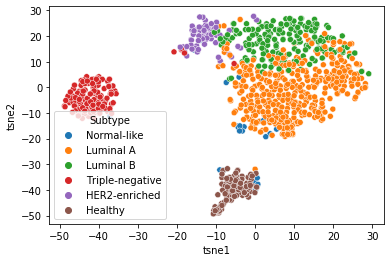

In [14]:
plt.tight_layout()
sns.scatterplot(x = data['tsne1'], y = data['tsne2'], hue = data['Subtype'])

In [28]:
X_1 = data[['comp1', 'comp2']].to_numpy()
y_1 = data['Subtype'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, stratify=y_1,
                                    test_size=0.2, random_state=13)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
scores = cross_val_score(model, X_1, y_1, scoring='accuracy', cv=RepeatedStratifiedKFold(n_repeats=100))

params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2], 'weights': ['distance', 'uniform']}
cv = GridSearchCV(model, params, scoring='accuracy', cv=RepeatedStratifiedKFold(n_repeats=100))
cv.fit(X_1, y_1)
print(cv.best_params_)
print(cv.best_score_)

{'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
0.8542076502732241


In [30]:
X_2 = data[['tsne1', 'tsne2']].to_numpy()
y_2 = data['Subtype'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, stratify=y_2,
                                    test_size=0.2, random_state=13)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
scores = cross_val_score(model, X_2, y_2, scoring='accuracy', cv=RepeatedStratifiedKFold(n_repeats=100))

params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2], 'weights': ['distance', 'uniform']}
cv = GridSearchCV(model, params, scoring='accuracy', cv=RepeatedStratifiedKFold(n_repeats=100))
cv.fit(X_2, y_2)
print(cv.best_params_)
print(cv.best_score_)

{'n_neighbors': 8, 'p': 1, 'weights': 'distance'}
0.8878360655737705
